In [1]:
from enum import Enum

import torch
import matplotlib.pyplot as plt

from fastai.basics     import *
from fastai.vision.all import *

from PIL import ImageFile

In [2]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
UNDEFINED_LABEL = "undef_lbl"

class SimpleLabel:
    EXPRESSIONISM         = "Expressionismo"
    ABSTRACT_ART          = "Arte abstrata"
    CUBISM                = "Cubismo"
    REALISM               = "Realismo"
    RENAISSANCE           = "Renascentismo"
    ART_NOUVEAU           = "Art Nouveau"
    BAROQUE               = "Barroco"
    FAUVISM               = "Fauvismo"
    IMPRESSIONISM         = "Impressionismo"
    POST_IMPRESSIONISM    = "Pos Impressionismo"
    NAIVE_ART_PRIMITIVISM = "Arte Naif"
    PONTILLISM            = "Pontilhismo"
    POP_ART               = "Pop-Art"
    ROCOCO                = "Rococo"
    ROMANTICISM           = "Romantismo"
    SYMBOLISM             = "Simbolismo"
    UKIYO_E               = "Ukiyo-e"
    
class AtomicLabel:
    ABSTRACT_EXPRESSIONISM     = "Expressionismo abstrato"
    ACTION_PAINTING            = "Gestualismo"
    MINIMALISM                 = "Minimalismo"
    COLOR_FIELD_PAINTING       = "Color Field"
    EXPRESSIONISM              = "Expressionismo"
    ANALYTICAL_CUBISM          = "Cubismo analitico"
    CUBISM                     = "Cubismo"
    SYNTHETIC_CUBISM           = "Cubismo sintetico"
    REALISM                    = "Realismo"
    CONTEMPORARY_REALISM       = "Realismo contemporaneo"
    NEW_REALISM                = "Novo realismo"
    EARLY_RENAISSANCE          = "Pré-Renascença"
    HIGH_RENAISSANCE           = "Alta Renascença"
    MANNERISM_LATE_RENAISSANCE = "Maneirismo"
    NORTHERN_RENAISSANCE       = "Renascimento nórdico"
    ART_NOUVEAU_MODERN         = "Art Nouveau"
    BAROQUE                    = "Barroco"
    FAUVISM                    = "Fauvismo"
    IMPRESSIONISM              = "Impressionismo"
    POST_IMPRESSIONISM         = "Pos-Impressionismo"
    NAIVE_ART_PRIMITIVISM      = "Arte Naif"
    POINTILLISM                = "Pontilhismo"
    POP_ART                    = "Pop-Art"
    ROCOCO                     = "Rococo"
    ROMANTICISM                = "Romantismo"
    SYMBOLISM                  = "Simbolismo"
    UKIYO_E                    = "Ukiyo-e"
    
SIMPLIFIED_LABEL_DICT = {
    "Abstract_Expressionism":     SimpleLabel.ABSTRACT_ART,
    "Action_painting":            SimpleLabel.ABSTRACT_ART,
    "Minimalism":                 SimpleLabel.ABSTRACT_ART,
    "Color_Field_Painting":       SimpleLabel.ABSTRACT_ART,
    "Expressionism":              SimpleLabel.EXPRESSIONISM,
    "Analytical_Cubism":          SimpleLabel.CUBISM,
    "Cubism":                     SimpleLabel.CUBISM,
    "Synthetic_Cubism":           SimpleLabel.CUBISM,
    "Realism":                    SimpleLabel.REALISM,
    "Contemporary_Realism":       SimpleLabel.REALISM,
    "New_Realism":                SimpleLabel.REALISM,
    "Early_Renaissance":          SimpleLabel.RENAISSANCE,
    "High_Renaissance":           SimpleLabel.RENAISSANCE,
    "Mannerism_Late_Renaissance": SimpleLabel.RENAISSANCE,
    "Northern_Renaissance":       SimpleLabel.RENAISSANCE,
    "Art_Nouveau_Modern":         SimpleLabel.ART_NOUVEAU,
    "Baroque":                    SimpleLabel.BAROQUE,
    "Fauvism":                    SimpleLabel.FAUVISM,
    "Impressionism":              SimpleLabel.IMPRESSIONISM,
    "Post_Impressionism":         SimpleLabel.POST_IMPRESSIONISM,
    "Naive_Art_Primitivism":      SimpleLabel.NAIVE_ART_PRIMITIVISM,
    "Pointillism":                SimpleLabel.PONTILLISM,
    "Pop_Art":                    SimpleLabel.POP_ART,
    "Rococo":                     SimpleLabel.ROCOCO,
    "Romanticism":                SimpleLabel.ROMANTICISM,
    "Symbolism":                  SimpleLabel.SYMBOLISM,
    "Ukiyo_e":                    SimpleLabel.UKIYO_E,
}

COMPLETE_LABEL_DICT = {
    "Abstract_Expressionism":     AtomicLabel.ABSTRACT_EXPRESSIONISM,
    "Action_painting":            AtomicLabel.ACTION_PAINTING,
    "Minimalism":                 AtomicLabel.MINIMALISM,
    "Color_Field_Painting":       AtomicLabel.COLOR_FIELD_PAINTING,
    "Expressionism":              AtomicLabel.EXPRESSIONISM,
    "Analytical_Cubism":          AtomicLabel.ANALYTICAL_CUBISM,
    "Cubism":                     AtomicLabel.CUBISM,
    "Synthetic_Cubism":           AtomicLabel.SYNTHETIC_CUBISM,
    "Realism":                    AtomicLabel.REALISM,
    "Contemporary_Realism":       AtomicLabel.CONTEMPORARY_REALISM,
    "New_Realism":                AtomicLabel.NEW_REALISM,
    "Early_Renaissance":          AtomicLabel.EARLY_RENAISSANCE,
    "High_Renaissance":           AtomicLabel.HIGH_RENAISSANCE,
    "Mannerism_Late_Renaissance": AtomicLabel.MANNERISM_LATE_RENAISSANCE,
    "Northern_Renaissance":       AtomicLabel.NORTHERN_RENAISSANCE,
    "Art_Nouveau_Modern":         AtomicLabel.ART_NOUVEAU_MODERN,
    "Baroque":                    AtomicLabel.BAROQUE,
    "Fauvism":                    AtomicLabel.FAUVISM,
    "Impressionism":              AtomicLabel.IMPRESSIONISM,
    "Post_Impressionism":         AtomicLabel.POST_IMPRESSIONISM,
    "Naive_Art_Primitivism":      AtomicLabel.NAIVE_ART_PRIMITIVISM,
    "Pointillism":                AtomicLabel.POINTILLISM,
    "Pop_Art":                    AtomicLabel.POP_ART,
    "Rococo":                     AtomicLabel.ROCOCO,
    "Romanticism":                AtomicLabel.ROMANTICISM,
    "Symbolism":                  AtomicLabel.SYMBOLISM,
    "Ukiyo_e":                    AtomicLabel.UKIYO_E,
}

def _val_or_undef(dict, key):
    if (key in dict):
        return dict[key]

    return UNDEFINED_LABEL

def label_simple(parent_dir):
    return _val_or_undef(SIMPLIFIED_LABEL_DICT, parent_dir)

def label_atomic(parent_dir):
    _val_or_undef(COMPLETE_LABEL_DICT, parent_dir)

In [4]:
DATASET_ROOT = "/home/buenogabriel1999_gmail_com/wikiart/wikiart"

def label_func(fname):
    return label_simple(parent_label(fname))

dblock = DataBlock(
    blocks     = (ImageBlock, CategoryBlock),
    get_items  = get_image_files,
    get_y      = label_func,
    splitter   = RandomSubsetSplitter(.8, .2),
    item_tfms  = RandomResizedCrop(128, min_scale=.35),
    batch_tfms = Normalize.from_stats(*imagenet_stats)
)

dloader = dblock.dataloaders(DATASET_ROOT, bs=32, num_workers=4)

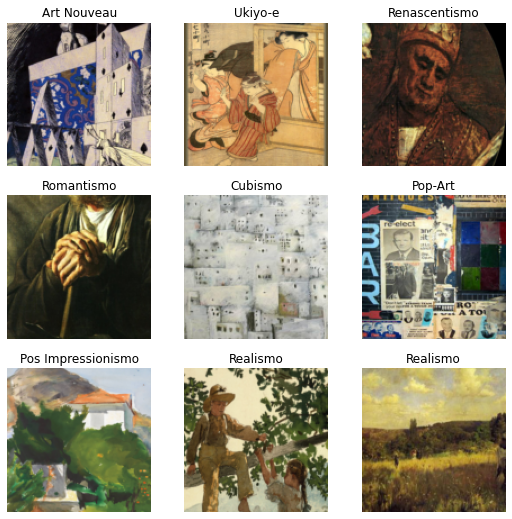

In [5]:
dloader.show_batch()

In [6]:
resnet34_learner = cnn_learner(dloader, models.resnet34, metrics=[error_rate])

resnet34_learner.model.cuda()
resnet34_learner.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.963371,1.681159,0.559887,18:36
1,1.708759,1.510471,0.509976,18:10
2,1.558832,1.422468,0.483946,18:01
3,1.457720,1.374228,0.465038,17:50
4,1.423081,1.329260,0.453496,17:58
5,1.419324,1.324621,0.449690,17:28


/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-packages/PIL/Image.py:2847: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-packages/PIL/Image.py:2847: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-packages/PIL/Image.py:2847: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-packages/PIL/Image.py:2847: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-package

SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=7.585775847473997e-07)

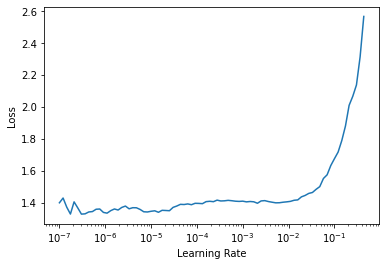

In [7]:
resnet34_learner.lr_find()

In [8]:
resnet34_learner.unfreeze()
resnet34_learner.fit_one_cycle(7, 1.096e-7)

epoch,train_loss,valid_loss,error_rate,time
0,1.450530,1.323838,0.450672,17:52
1,1.416004,1.319799,0.449629,18:32
2,1.423927,1.321380,0.448155,18:30
3,1.431637,1.322148,0.448892,18:19
4,1.391577,1.319278,0.450058,18:04
5,1.404458,1.319976,0.449444,18:09
6,1.426220,1.319302,0.448892,18:05


/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-packages/PIL/Image.py:2847: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-packages/PIL/Image.py:2847: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-packages/PIL/Image.py:2847: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-packages/PIL/Image.py:2847: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/buenogabriel1999_gmail_com/.local/lib/python3.8/site-package

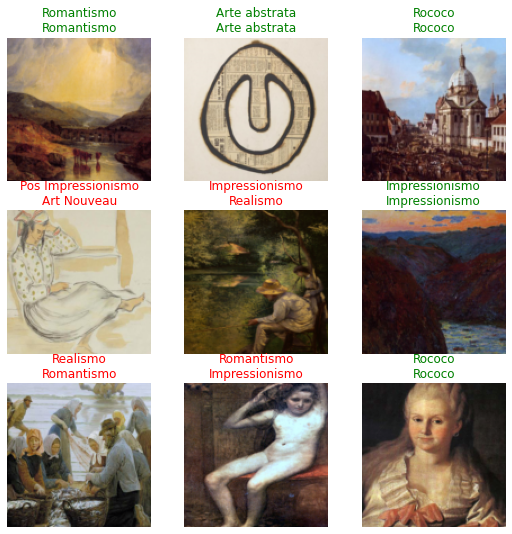

In [10]:
resnet34_learner.show_results()

In [11]:
r34_classif_interpretation = ClassificationInterpretation.from_learner(resnet34_learner)

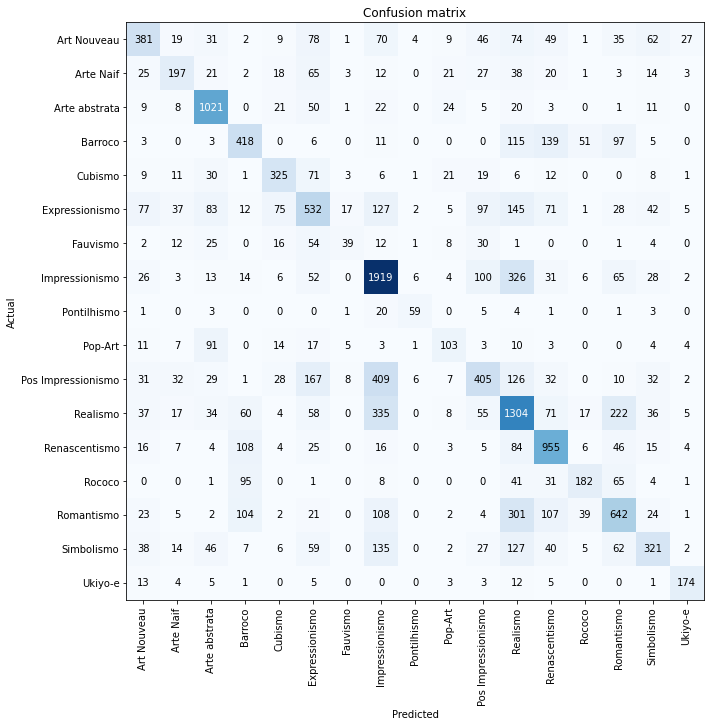

In [12]:
r34_classif_interpretation.plot_confusion_matrix(figsize=(10,10))

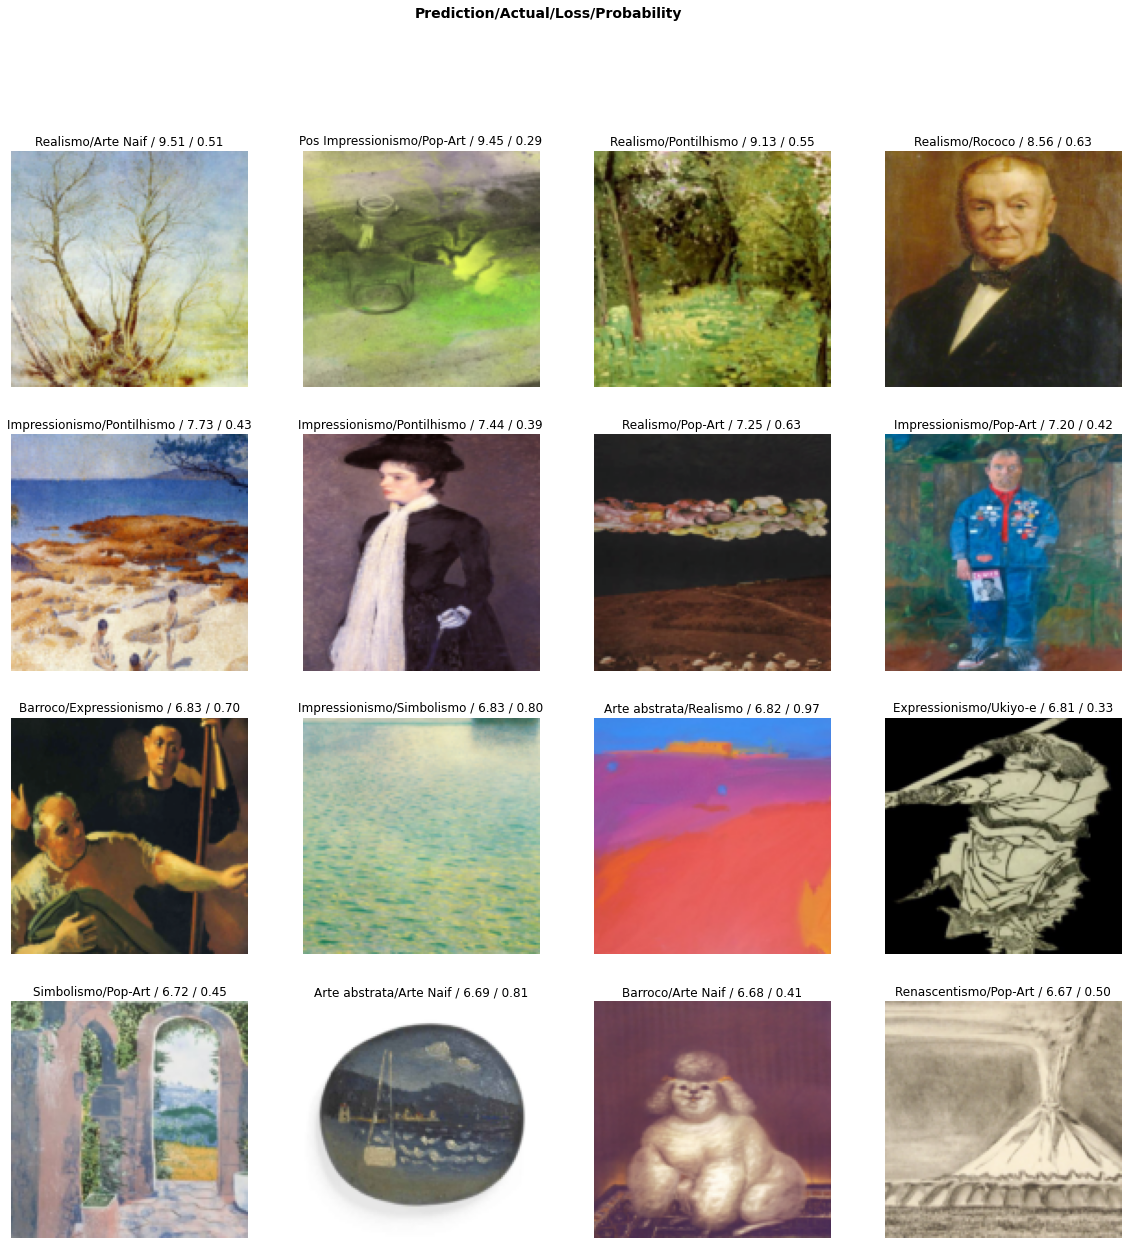

In [13]:
r34_classif_interpretation.plot_top_losses(16, nrows=4, figsize=(20,20))

In [14]:
MODELS_FOLDER = "/home/buenogabriel1999_gmail_com/Camille/Camille/training/models/"

resnet34_learner.export(MODELS_FOLDER + "resnet34.pkl")